### Traveling Salesman Problem - Ant Colony Optimization 

In [23]:
from sko.ACA import ACA_TSP
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('./data/distanceslonglat.csv')
df.head()

,Unnamed: 0,Start,Target,StartLatitude,TargetLatitude,StartLongitude,TargetLongitude,Distance
0,0,"Aberdeen, Scotland","Aberdeen, Scotland",57.15,57.150000,-2.15,-2.150000,0.000000
1,1,"Aberdeen, Scotland","Adelaide, Australia",57.15,-34.916667,-2.15,138.600000,16183.676404
2,2,"Aberdeen, Scotland","Algiers, Algeria",57.15,36.833333,-2.15,3.000000,2290.736724
3,3,"Aberdeen, Scotland","Amsterdam, Netherlands",57.15,52.366667,-2.15,4.883333,698.243287
4,4,"Aberdeen, Scotland","Ankara, Turkey",57.15,39.916667,-2.15,32.916667,3164.736857


In [15]:
cities = df['Start'].unique()
cities_index = dict(zip(cities, range(len(cities))))
df['Start'] = [cities_index[city] for city in df['Start']]
df['Target'] = [cities_index[city] for city in df['Target']]

df.head()

,Unnamed: 0,Start,Target,StartLatitude,TargetLatitude,StartLongitude,TargetLongitude,Distance
0,0,0,0,57.15,57.150000,-2.15,-2.150000,0.000000
1,1,0,1,57.15,-34.916667,-2.15,138.600000,16183.676404
2,2,0,2,57.15,36.833333,-2.15,3.000000,2290.736724
3,3,0,3,57.15,52.366667,-2.15,4.883333,698.243287
4,4,0,4,57.15,39.916667,-2.15,32.916667,3164.736857


In [16]:
start = df['Start'].to_list()
new_df = pd.DataFrame(columns=set(start))

for i in start:
    rows = df.loc[df['Start'] == i]
    distances = rows['Distance'].to_list()
    new_df.loc[i] = distances
     
new_df

,0,1,2,3,4,5,6,7,8,9,...,110,111,112,113,114,115,116,117,118,119
0,0.000000,16183.676404,2290.736724,698.243287,3164.736857,10497.838945,2853.068356,17737.467699,9479.632289,1780.292512,...,4611.724960,9116.112911,2933.006398,1642.048788,8474.906178,1586.938303,8095.574445,1580.590929,18225.930564,1308.064911
1,16183.676404,0.000000,16045.766906,15901.250283,13612.732892,13129.127008,14296.585732,3251.595180,6722.576827,16179.992790,...,11921.701262,7814.818418,15036.187551,15387.830470,14392.913474,15107.633218,8672.568511,14806.331337,3226.842692,15689.313991
2,2290.736724,16045.766906,0.000000,1732.435895,2624.093734,9359.286314,1834.839762,19289.875337,9759.076155,510.444322,...,4332.344619,10823.119000,1026.319285,1233.674492,9535.580248,1669.456388,9758.271749,2217.832333,19152.045250,1253.302097
3,698.243287,15901.250283,1732.435895,0.000000,2545.398635,10517.306925,2167.172717,18110.156339,9185.435547,1238.409750,...,4092.065551,9316.899312,2258.554763,943.830561,9064.986243,934.908559,8269.121767,1097.270710,18558.002017,615.923758
4,3164.736857,13612.732892,2624.093734,2545.398635,0.000000,11811.878904,826.034396,16697.380047,7135.556527,2593.622549,...,1717.495370,8785.923212,1924.102522,1788.925777,11609.742105,1612.701407,7744.618481,1645.769164,16817.176714,2123.870121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1586.938303,15107.633218,1669.456388,934.908559,1612.701407,10963.614693,1287.803946,17851.504058,8451.808775,1352.506710,...,3208.270607,9155.127123,1717.378219,435.791774,9997.106986,0.000000,8089.813261,555.473229,18153.065147,593.571650
116,8095.574445,8672.568511,9758.271749,8269.121767,7744.618481,17833.259803,8481.114914,9862.866291,4437.739680,9382.883054,...,6688.099877,1066.100958,9536.284125,8525.239069,11536.373280,8089.813261,0.000000,7540.629450,10289.705531,8548.688718
117,1580.590929,14806.331337,2217.832333,1097.270710,1645.769164,11458.810487,1599.562171,17343.920618,8097.440039,1867.517639,...,3034.415266,8605.310219,2232.575791,986.862879,10052.425250,555.473229,7540.629450,0.000000,17690.611068,1048.119316
118,18225.930564,3226.842692,19152.045250,18558.002017,16817.176714,10876.163223,17523.426747,490.333691,9738.885073,19406.298842,...,15105.077467,9241.108654,18145.480586,18527.847206,11315.124563,18153.065147,10289.705531,17690.611068,0.000000,18732.576050


In [17]:
distance_matrix = new_df.to_numpy()

In [18]:
def cal_total_distance(routine):
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [20]:
from tqdm import tqdm

max_iter = [100, 250, 500]
acas = []

for i in tqdm(max_iter):
    aca = ACA_TSP(func=cal_total_distance, n_dim=len(set(start)),
                size_pop=50, max_iter=i,
                distance_matrix=distance_matrix)
    aca.run()
    acas.append(aca)

100%|██████████| 3/3 [07:55<00:00, 158.56s/it]


In [21]:
for aca in acas:
    print(f"Min Distance :{aca.best_y} km Iterations : {aca.max_iter}")

Min Distance :164669.89081808503 km Iterations : 100
Min Distance :125347.08974178489 km Iterations : 250
Min Distance :123560.46792022507 km Iterations : 500


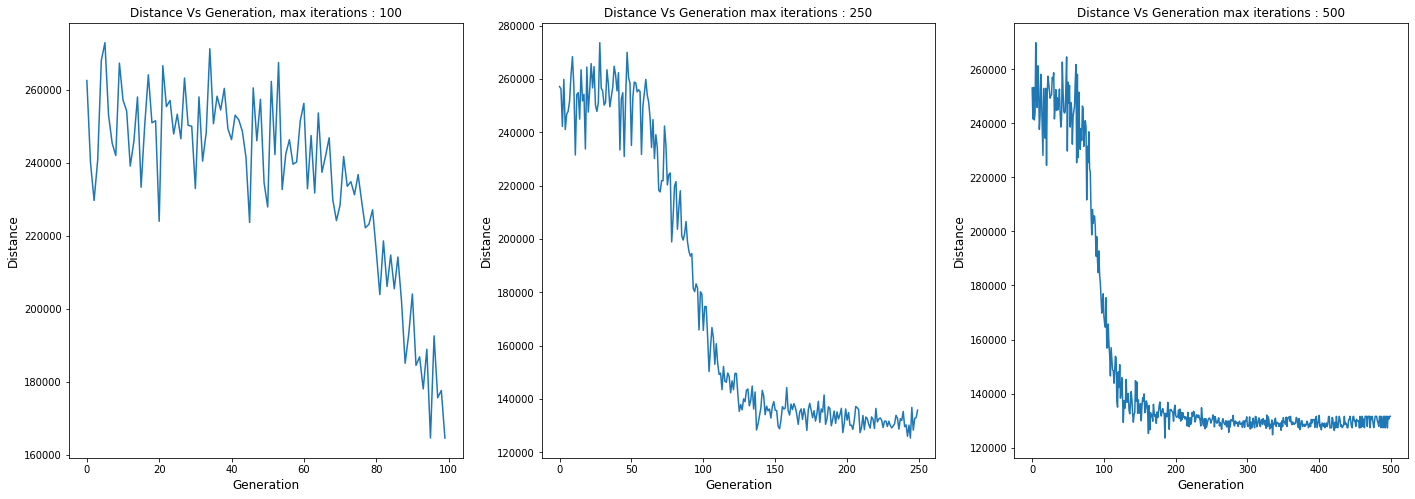

In [24]:
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(acas[0].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation, max iterations : 100")

plt.subplot(1, 3, 2)
plt.plot(acas[1].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation max iterations : 250")

plt.subplot(1, 3, 3)
plt.plot(acas[2].y_best_history)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title("Distance Vs Generation max iterations : 500")
plt.show()

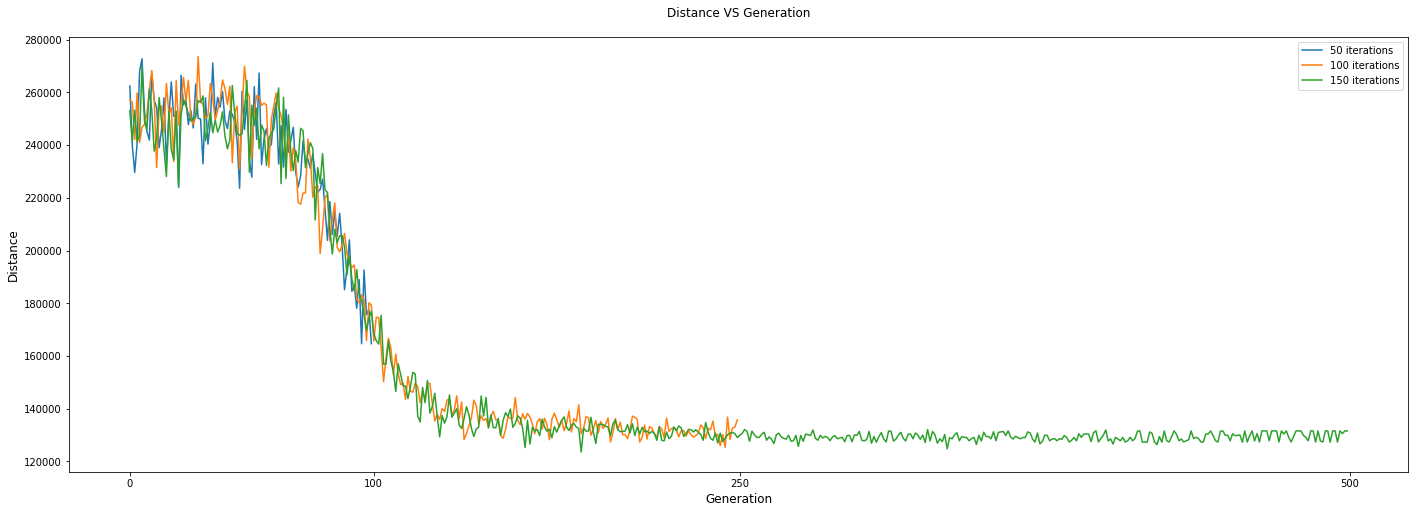

In [32]:
plt.figure(figsize=(24, 8))

plt.title("Distance VS Generation", pad=20)
plt.xlabel("Generation", fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.xticks([0, 100, 250, 500])

plt.plot(acas[0].y_best_history)
plt.plot(acas[1].y_best_history)
plt.plot(acas[2].y_best_history)
plt.legend(labels=["50 iterations", "100 iterations", "150 iterations"])
plt.show()